In [1]:
# Import packages
import numpy as np
import tomopy
import matplotlib.pyplot as plt
from skimage.transform import rotate, AffineTransform
from skimage import transform as tf
import tifffile

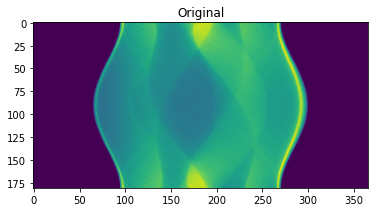

In [2]:
# Creating ground truth tomography
data = tomopy.shepp3d(256)
ang = tomopy.angles(181)
proj = tomopy.project(data, ang)

# Sinogram for original
plt.imshow(proj[:, 128, :])
plt.title('Original')
plt.show()

In [3]:
# Randomly determined misalignment axis
mis_axis = np.random.normal(0, 1, (200, 3))
mis_axis[:, :1] = mis_axis[:, :1]*4
mis_axis = np.round(mis_axis).astype(int)

In [4]:
# Define function for artificial misalignment
def misalign(prj, mis_axis, ang_tilt = False, noise = False, background = False):
    num_prj, col, row = prj.shape
    dx = mis_axis[:, 0]
    dy = mis_axis[:, 1]
    prj_tmp = tomopy.shift_images(prj, dx, dy)
    
    for i in range(num_prj):
        d_row, d_col, d_ang = mis_axis[i]
        
        if ang_tilt == True:
            prj_tmp[i, :, :] = rotate(prj[i,:,:], d_ang)
        else:
            prj_tmp[i, :, :] = prj[i,:,:]
        
        if noise == True:
            prj_tmp[i, :, :] = random_noise(prj_tmp[i, :, :], mode = 'gaussian')
            
        if background == True:
            prj_tmp[i, :, :] = prj_tmp[i, :, :]+np.random.random()/5
            prj_tmp[i, :, :] = prj_tmp[i, :, :]/prj_tmp[i, :, :].max()  
            
    return prj_tmp

In [5]:
# Creating misaligned projections
proj_mis = misalign(proj.copy(), mis_axis, ang_tilt = True)

In [6]:
# Creating realigned projection using joint alignment
proj_align = tomopy.align_joint(proj_mis.copy(), ang, iters = 100, algorithm = 'sirt')

iter=0, err=0.2705253568287948
iter=1, err=0.014533642856967604
iter=2, err=0.005924754444209647
iter=3, err=0.004385223258920087
iter=4, err=0.0032685524150586048
iter=5, err=0.002817137915078858
iter=6, err=0.0025318098214698608
iter=7, err=0.001992017308945243
iter=8, err=0.002344000422679371
iter=9, err=0.0019138683341287373
iter=10, err=0.002067214056645846
iter=11, err=0.002067214056645846
iter=12, err=0.0016574585882339688
iter=13, err=0.001562666943034828
iter=14, err=0.0012353966910606626
iter=15, err=0.0016574585882339688
iter=16, err=0.0017471147554088333
iter=17, err=0.0014617410776184296
iter=18, err=0.0012353966910606626
iter=19, err=0.000956934162087539
iter=20, err=0.0005524861960779896
iter=21, err=0.0011049723921559792
iter=22, err=0.000956934162087539
iter=23, err=0.0
iter=24, err=0.0011049723921559792
iter=25, err=0.0011049723921559792
iter=26, err=0.0011049723921559792
iter=27, err=0.0005524861960779896
iter=28, err=0.000781333471517414
iter=29, err=0.0007813334715

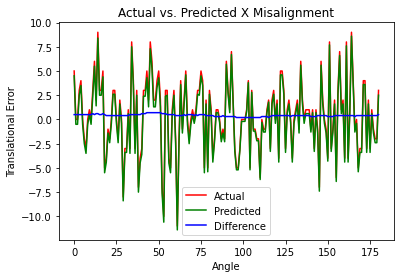

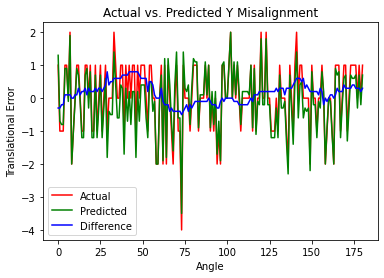

In [7]:
# Apply translations to original
true_x = mis_axis[:181, 0]
true_y = mis_axis[:181, 1]
x_translation = proj_align[1]
y_translation = proj_align[2]

# Create realigned projections
proj_re = tomopy.shift_images(proj_mis.copy(), x_translation, y_translation)

# Plot shows the actual x misalignment vs. predicted
plt.plot(true_x, color = 'r', label = 'Actual')
plt.plot(-x_translation, color = 'g', label = 'Predicted')
plt.plot(true_x + x_translation, color = 'b', label = 'Difference')
plt.xlabel("Angle")
plt.ylabel("Translational Error")
plt.title("Actual vs. Predicted X Misalignment")
plt.legend()
plt.show()

# Plot shows the actual x and y misalignment vs. modeled
plt.plot(true_y, color = 'r', label = 'Actual')
plt.plot(-y_translation, color = 'g', label = 'Predicted')
plt.plot(true_y + y_translation, color = 'b', label = 'Difference')
plt.xlabel("Angle")
plt.ylabel("Translational Error")
plt.title("Actual vs. Predicted Y Misalignment")
plt.legend()
plt.show()

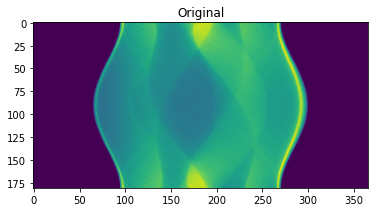

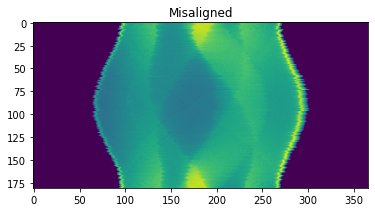

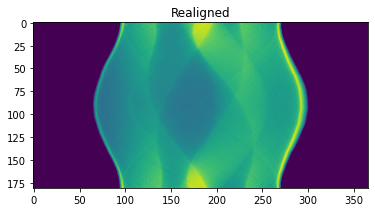

In [8]:
# Sinogram for original
plt.imshow(proj[:, 128, :])
plt.title('Original')
plt.show()

# Sinogram for misaligned
plt.imshow(proj_mis[:, 128, :])
plt.title('Misaligned')
plt.show()

# Sinogram for realigned
plt.imshow(proj_re[:, 128, :])
plt.title('Realigned')
plt.show()